# Bollywood Movie Analysis (1920–2024)
This notebook analyzes Bollywood movies dataset using:
- **PostgreSQL (via pgAdmin4)**
- **Python (Jupyter Notebook)**
- **Power BI for visualization**

Dataset: Bollywood movies from 1920 to 2024.


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "bollywood_movies_cleaned.csv"
df = pd.read_csv(file_path)

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9431 entries, 0 to 9430
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie ID       9431 non-null   int64 
 1   Title          9431 non-null   object
 2   Year           9431 non-null   int64 
 3   Genre          9431 non-null   object
 4   Primary_Genre  9431 non-null   object
dtypes: int64(2), object(3)
memory usage: 368.5+ KB


,Movie ID,Title,Year,Genre,Primary_Genre
0,3456,balika badhu a.k.a. baby bride,1920,social,social
1,3476,vikram urvashi,1920,mythology,mythology
2,3474,sita swayamwar a.k.a. sita's marriage,1920,mythology,mythology
3,3473,shri rama janma,1920,mythology,mythology
4,3472,shri krishna leela,1920,mythology,mythology


In [7]:
# Check for missing values
df.isnull().sum()

# Basic stats
df.describe(include='all')

# Unique genres
df['Primary_Genre'].value_counts()


Primary_Genre
Unknown              1536
social               1458
drama                1431
action               1409
romance               662
                     ... 
cult                    1
rom-com                 1
computer-animated       1
abrar                   1
experimental            1
Name: count, Length: 119, dtype: int64

In [8]:
# Check for missing values
df.isnull().sum()

# Basic stats
df.describe(include='all')

# Unique genres
df['Primary_Genre'].value_counts()


Primary_Genre
Unknown              1536
social               1458
drama                1431
action               1409
romance               662
                     ... 
cult                    1
rom-com                 1
computer-animated       1
abrar                   1
experimental            1
Name: count, Length: 119, dtype: int64

In [17]:
import pandas as pd
from sqlalchemy import create_engine

# Load CSV
df = pd.read_csv('bollywood_movies_cleaned.csv')

# Create SQLite engine
engine = create_engine('sqlite:///bollywood.db')

# Save data to SQLite
df.to_sql('bollywood_movies', engine, if_exists='replace', index=False)

print("Database created: bollywood.db with table bollywood_movies")


Database created: bollywood.db with table bollywood_movies


In [21]:
import sqlite3

# Create SQLite DB in memory or file
conn = sqlite3.connect('bollywood.db')

# Save DataFrame to SQLite
df.to_sql('bollywood_movies', conn, if_exists='replace', index=False)


9431

In [22]:
query = "SELECT COUNT(*) FROM bollywood_movies;"
pd.read_sql(query, conn)


,COUNT(*)
0,9431


### Movies count by decade

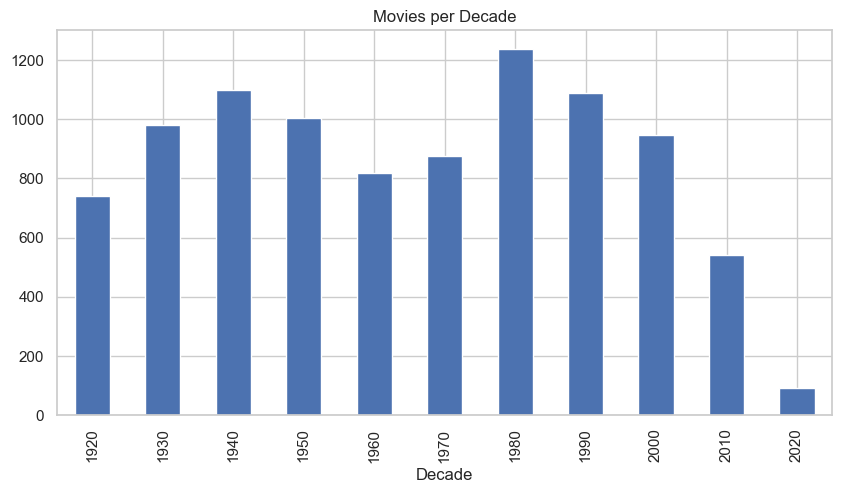

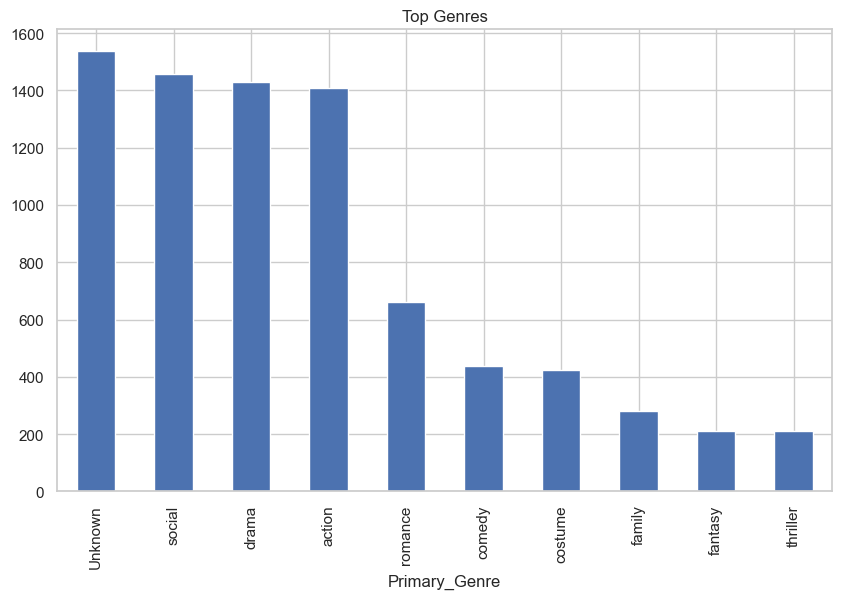

In [9]:
# Movies count by decade
df['Decade'] = (df['Year'] // 10) * 10
movies_by_decade = df.groupby('Decade')['Title'].count()
movies_by_decade.plot(kind='bar', figsize=(10,5), title='Movies per Decade')
plt.show()

# Top 10 genres
df['Primary_Genre'].value_counts().head(10).plot(kind='bar', title='Top Genres')
plt.show()


### Genre trend by decade

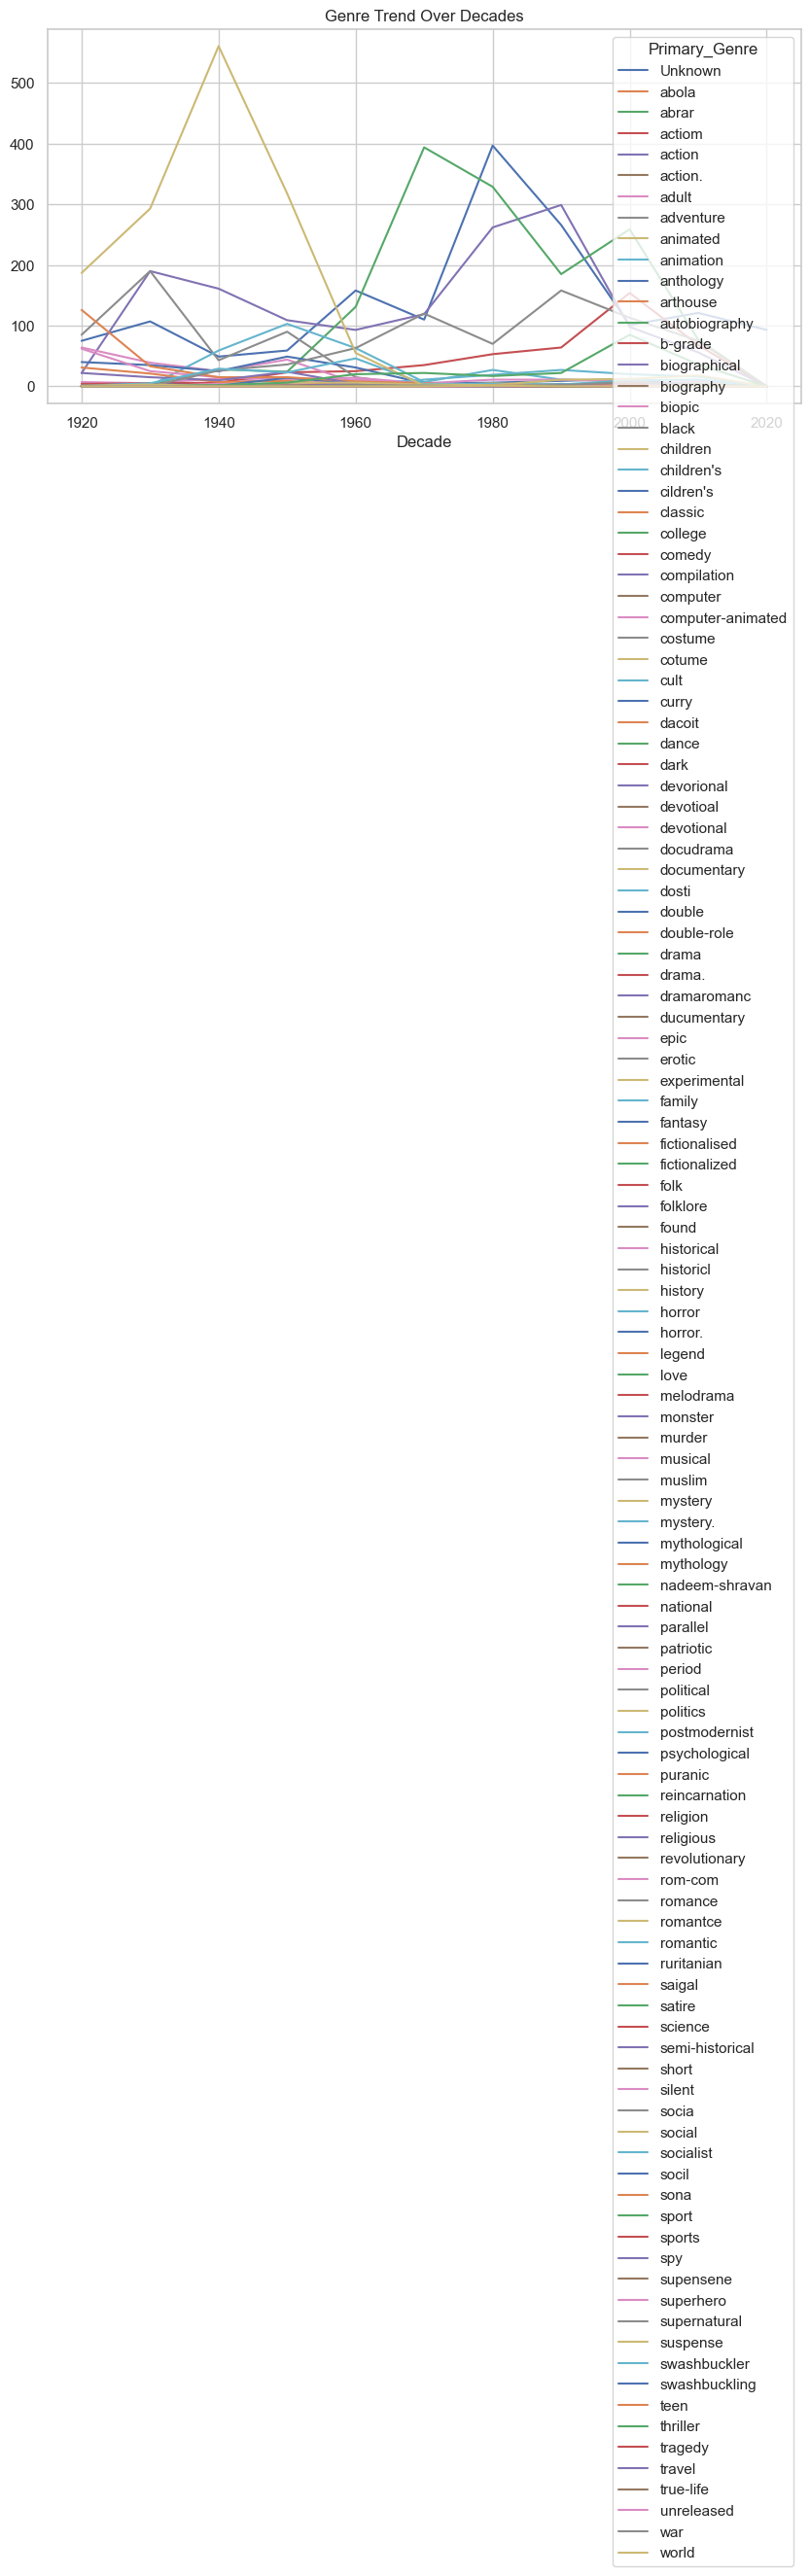

In [14]:
# Genre trend by decade
genre_trend = df.groupby(['Decade', 'Primary_Genre']).size().unstack(fill_value=0)
genre_trend.plot(kind='line', figsize=(10,5))
plt.title('Genre Trend Over Decades')
plt.show()


In [15]:
df.to_csv("movies_for_powerbi.csv", index=False)


## 5. Summary of Insights
- Most popular genres
- Top-rated directors
- Yearly movie release trend
- Lead actors frequency
- Rating trends per decade
- Duration vs rating relationship
- Highest-grossing films